<a href="https://colab.research.google.com/github/NishWasHere/Celebal-Assignment/blob/main/WEEK4_House_Price_Prediction_%26_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HOUSE PRICE PREDICTION AND EXPLORATORY DATA ANALYSIS**

**IMPORTING NECESSARY LIBRARIES**

In [1]:
#FOR EDA AND VISUALISATION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#FOR MACHINE LEARNING
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/HousePricePrediction.csv')
df
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [4]:
df.shape

(2919, 13)

### **DATA PREPROCESSING**

In [5]:
obj = (df.dtypes =='object')
object_cols = list(obj[obj].index)
print('categorical variables',len(object_cols))

categorical variables 4


In [6]:
Int = (df.dtypes == 'int')
Int_cols = list(Int[Int].index)
print('Integers variables', len(Int_cols))

Integers variables 6


In [7]:
Float = (df.dtypes == 'float')
Float_cols = list(Float[Float].index)
print('Float Variables',len(Float_cols))

Float Variables 3


### **EXPLORATORY DATA ANALYSIS**

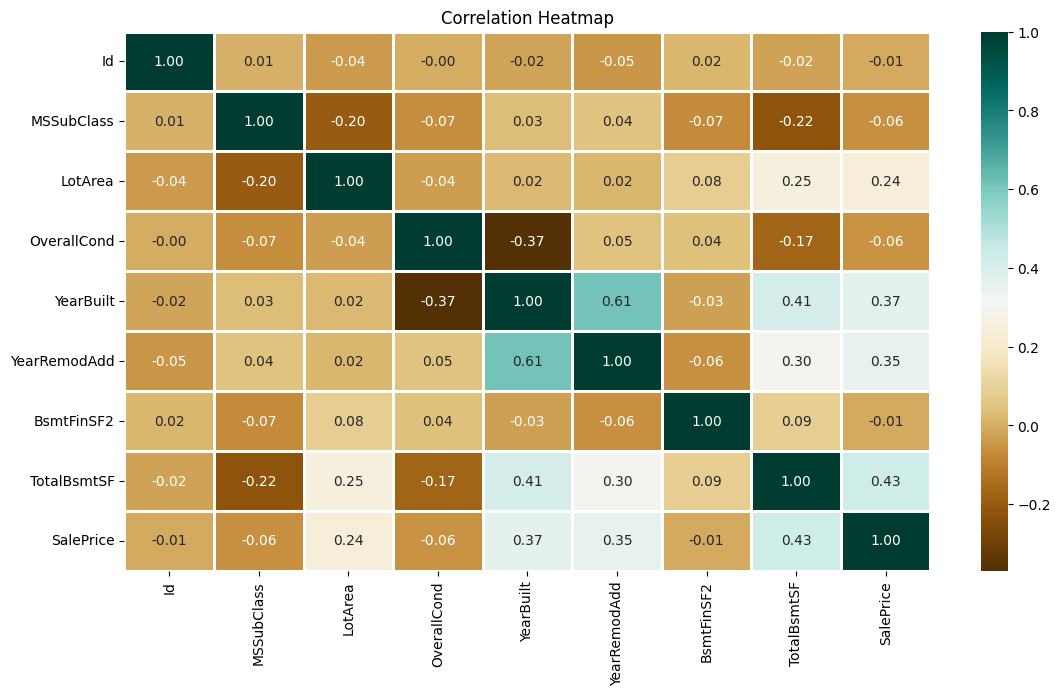

In [22]:
plt.figure(figsize=(13,7))

# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Draw heatmap
sns.heatmap(corr_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.title("Correlation Heatmap")
plt.show()

<Axes: title={'center': 'NO. OF UNIQUE VALUES IN CATEGORICAL VARIABLES'}>

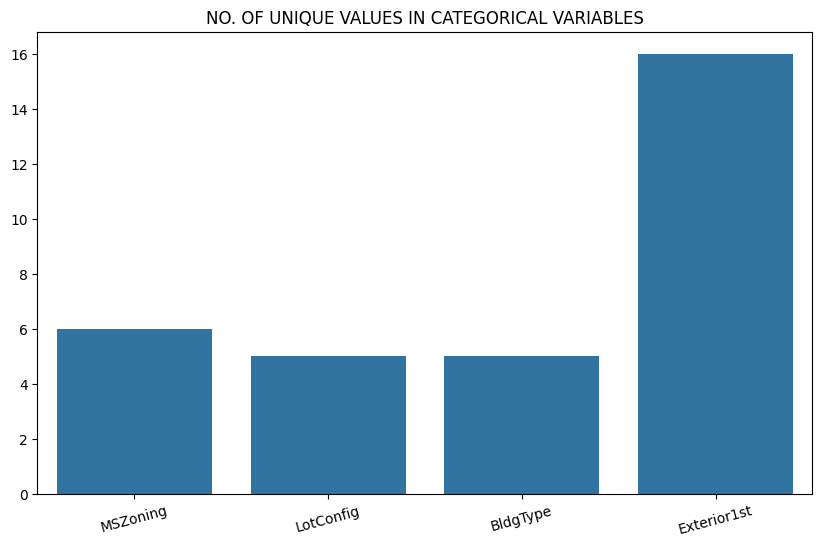

In [9]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("NO. OF UNIQUE VALUES IN CATEGORICAL VARIABLES")
plt.xticks(rotation = 15)
sns.barplot(x=object_cols,y=unique_values)

<Axes: title={'center': 'NO. OF UNIQUE VALUES IN INTEGER VARIABLES'}>

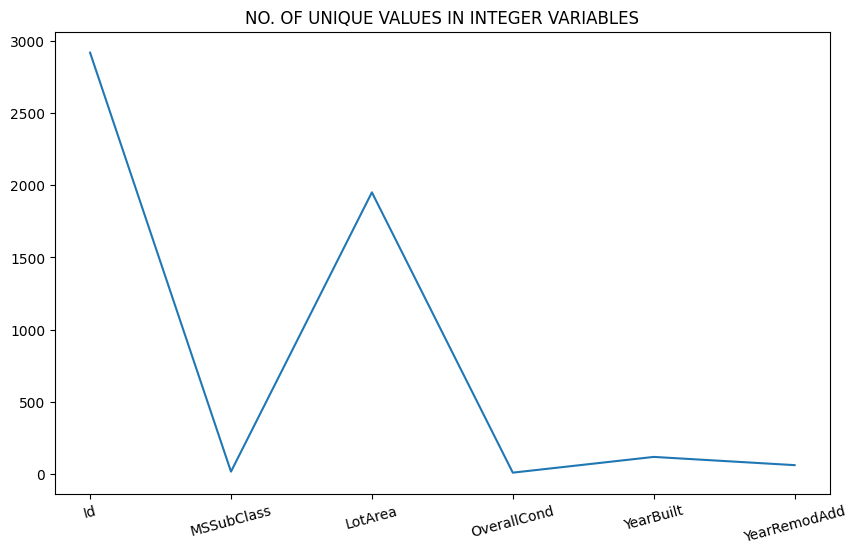

In [10]:
unique_values = []
for col in Int_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("NO. OF UNIQUE VALUES IN INTEGER VARIABLES")
plt.xticks(rotation = 15)
sns.lineplot(x=Int_cols,y=unique_values)

<Axes: title={'center': 'NO. OF UNIQUE VALUES IN FLOAT VARIABLES'}>

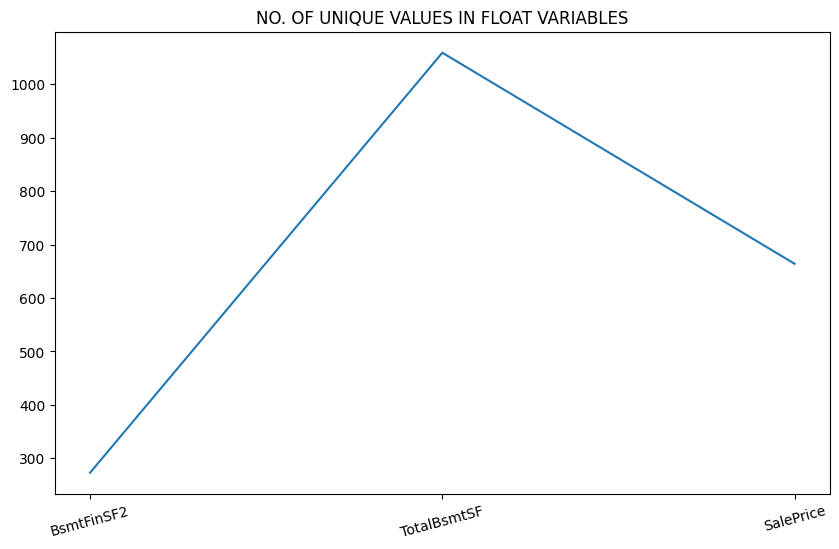

In [11]:
unique_values = []
for col in Float_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("NO. OF UNIQUE VALUES IN FLOAT VARIABLES")
plt.xticks(rotation = 15)
sns.lineplot(x=Float_cols,y=unique_values)

<ipython-input-12-631989441>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(y.index, rotation=90)
<ipython-input-12-631989441>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(y.index, rotation=90)
<ipython-input-12-631989441>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(y.index, rotation=90)
<ipython-input-12-631989441>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(y.index, rotation=90)


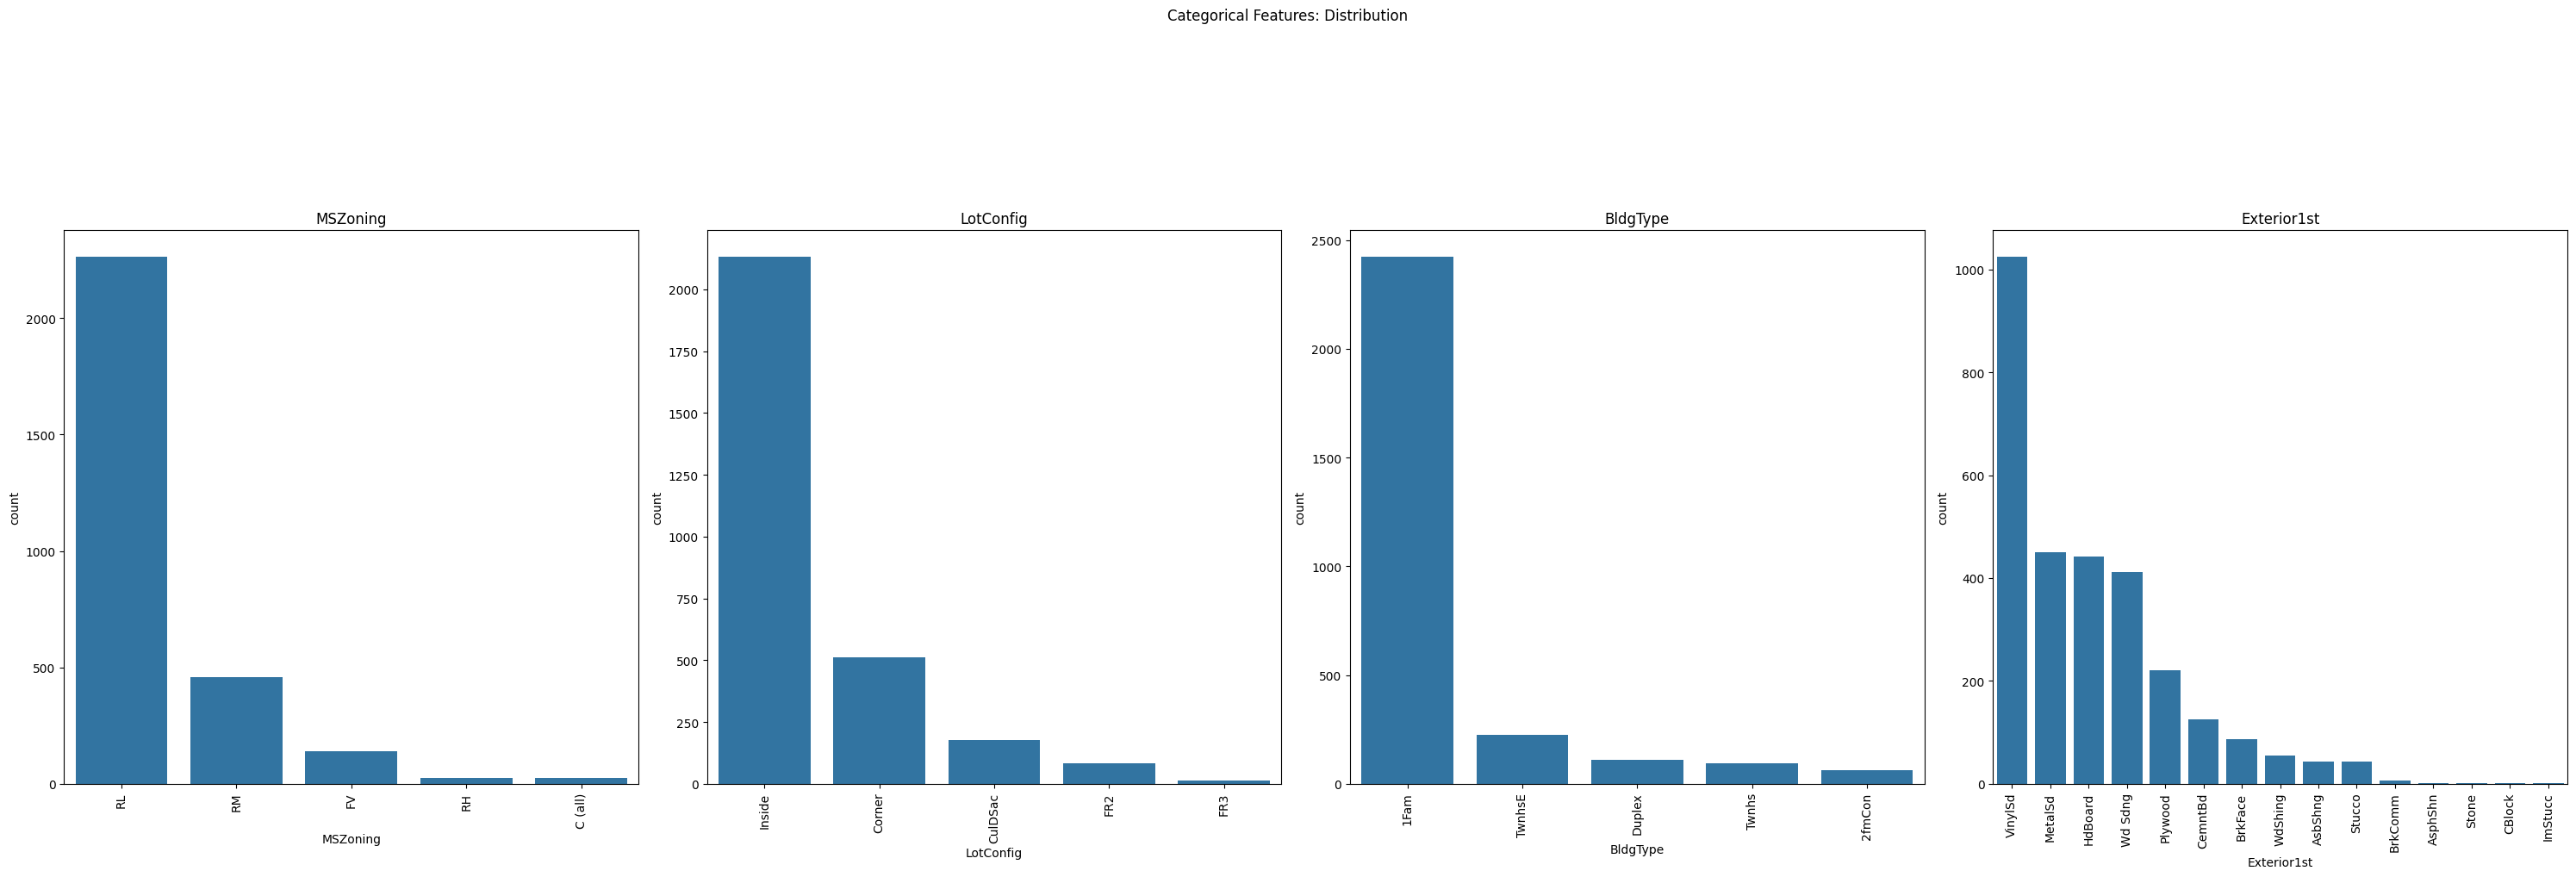

In [12]:
fig = plt.figure(figsize=(30, 86))
fig.suptitle('Categorical Features: Distribution')
index = 1

for col in object_cols:
    y = df[col].value_counts()
    ax = fig.add_subplot(11, 4, index)
    ax.set_xticklabels(y.index, rotation=90)
    sns.barplot(x=y.index, y=y, ax=ax)
    index += 1
    ax.set_title(col)

    # Explicitly remove overlapping axes
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)

plt.show()

### **DATA CLEANING**

In [13]:
df['SalePrice'] = df['SalePrice'].fillna(
    df['SalePrice'].mean()
)

In [14]:
new_df = df.dropna()
new_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


### **ONE HOT ENCODER - FOR LABEL CATEGORICAL FEATURES AND SPLITTING DATASET INTO TRAINING AND TESTING**

In [15]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print('catogorical Variables: ')
print(object_cols)
print('no.of catogorical Variables:',len(object_cols))

catogorical Variables: 
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
no.of catogorical Variables: 4


In [16]:
one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_cols = pd.DataFrame(one_hot_encoder.fit_transform(new_df[object_cols]))
one_hot_cols.index = new_df.index
one_hot_columns = one_hot_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis =1)
df_final = pd.concat([df_final,one_hot_cols],axis =1)

In [17]:
'''Now splitting data into Training and Testing'''
X = df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']
X.columns = X.columns.astype(str)


#splitting the training set into
#training and validation set
X_train, X_valid,Y_train,Y_valid = train_test_split(
    X,Y,train_size = 0.8,test_size = 0.2,random_state = 0
)


## **MODEL AND ACCURACY**
SVM,RANDOM FOREST REGRESSION, LINEAR REGRESSION

### **SUPPORT VECTOR MACHINE**

In [18]:
# Train the model
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)

# Make predictions
Y_pred = model_SVR.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
print('Mean absolute percentage error:', mspe)



Mean absolute percentage error: 0.18704778826125987


### **RANDOM FOREST REGRESSION**

In [19]:
# Train the model
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)

# Make predictions
Y_pred = model_RFR.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
print('Mean absolute percentage error:', mspe)


Mean absolute percentage error: 0.08335472691763034


### **LINEAR REGRESSION**

In [20]:
# Train the model
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

# Make predictions
Y_pred = model_LR.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
print('Mean absolute percentage error:', mspe)

Mean absolute percentage error: 0.18633155158087403


### **CONCLUDING:**
**Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.**